#  Assignment 1 Machine Learning


Link NoteBook On Colab :  https://colab.research.google.com/drive/1jgQgQJ0YRg5hVlv20v2rj7M7r4yg9Gw8?usp=sharing

### student performance dataset

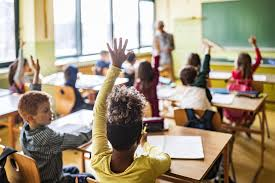

In [47]:
from IPython.display import Image
Image(filename='images.jpeg' , width=400, height=600)

`🔹 Demographics & Personal Information`

| Column    | Meaning                                                                     |
|-----------|-----------------------------------------------------------------------------|
| school    | The school the student attends (e.g., GP = Gabriel Pereira, MS = Mousinho da Silveira). |
| sex       | Gender of the student (F = female, M = male).                               |
| age       | Age of the student (numeric).                                               |
| address   | Type of home address (U = urban, R = rural).                                |
| famsize   | Family size (LE3 = ≤3 members, GT3 = >3 members).                            |
| Pstatus   | Parent's cohabitation status (T = together, A = apart).                    |

`🔹 Parental & Family Background`

| Column   | Meaning                                                        |
|----------|----------------------------------------------------------------|
| Medu     | Mother's education level (0 to 4, where 4 = higher education). |
| Fedu     | Father's education level (same scale as Medu).                |
| Mjob     | Mother's job (teacher, health, services, at_home, other).      |
| Fjob     | Father's job (same categories as Mjob).                       |
| guardian | Student's guardian (mother, father, other).                    |

`🔹 Academic and Study Factors`

| Column     | Meaning                                                                 |
|------------|-------------------------------------------------------------------------|
| reason     | Reason for choosing this school (home, reputation, course, other).       |
| traveltime | Travel time to school (1 = <15 min, 2 = 15-30 min, 3 = 30-60 min, 4 = >1 hour). |
| studytime  | Weekly study time (1 = <2 hrs, 2 = 2-5 hrs, 3 = 5-10 hrs, 4 = >10 hrs).   |
| failures   | Number of past class failures (numeric: 0-3+).                           |

`🔹 School Support & Activities`

| Column     | Meaning                                        |
|------------|------------------------------------------------|
| schoolsup  | Extra educational support (yes / no).          |
| famsup     | Family educational support (yes / no).         |
| paid       | Extra paid classes (e.g., tutoring) (yes / no). |
| activities | Extracurricular activities (yes / no).         |
| nursery    | Attended nursery school (yes / no).            |
| higher     | Wants to pursue higher education (yes / no).   |
| internet   | Internet access at home (yes / no).            |
| romantic   | Currently in a romantic relationship (yes / no). |

`🔹 Social and Health Factors`

| Column   | Meaning                                                       |
|----------|---------------------------------------------------------------|
| famrel   | Family relationship quality (1 = very bad to 5 = excellent). |
| freetime | Free time after school (1 = very low to 5 = very high).      |
| goout    | Going out with friends (same scale as above).                 |
| Dalc     | Workday alcohol consumption (1 = very low to 5 = very high). |
| Walc     | Weekend alcohol consumption (same scale).                    |
| health   | Current health status (1 = very bad to 5 = very good).       |
| absences | Number of school absences.                                  |

`🔹 Academic Performance`

| Column | Meaning                         |
|--------|---------------------------------|
| G1     | Grade in the first period (numeric: 0-20). |
| G2     | Grade in the second period (numeric: 0-20).|
| G3     | Final grade (numeric: 0-20).     |

In [48]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

- Loaded the dataset

In [49]:
df = pd.read_csv('student-por.csv')

### Exploratory Data Analysis (EDA) – And Preprocessing :

In [ ]:
# Convert binary categorical values to 0/1
binary_map = {
    "yes": 1, "no": 0,
    "F": 0, "M": 1,
    "U": 1, "R": 0,
    "LE3": 0, "GT3": 1,
    "T": 1, "A": 0
}
df_encoded = df.replace(binary_map)

In [51]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [52]:
sns.set(style="whitegrid")

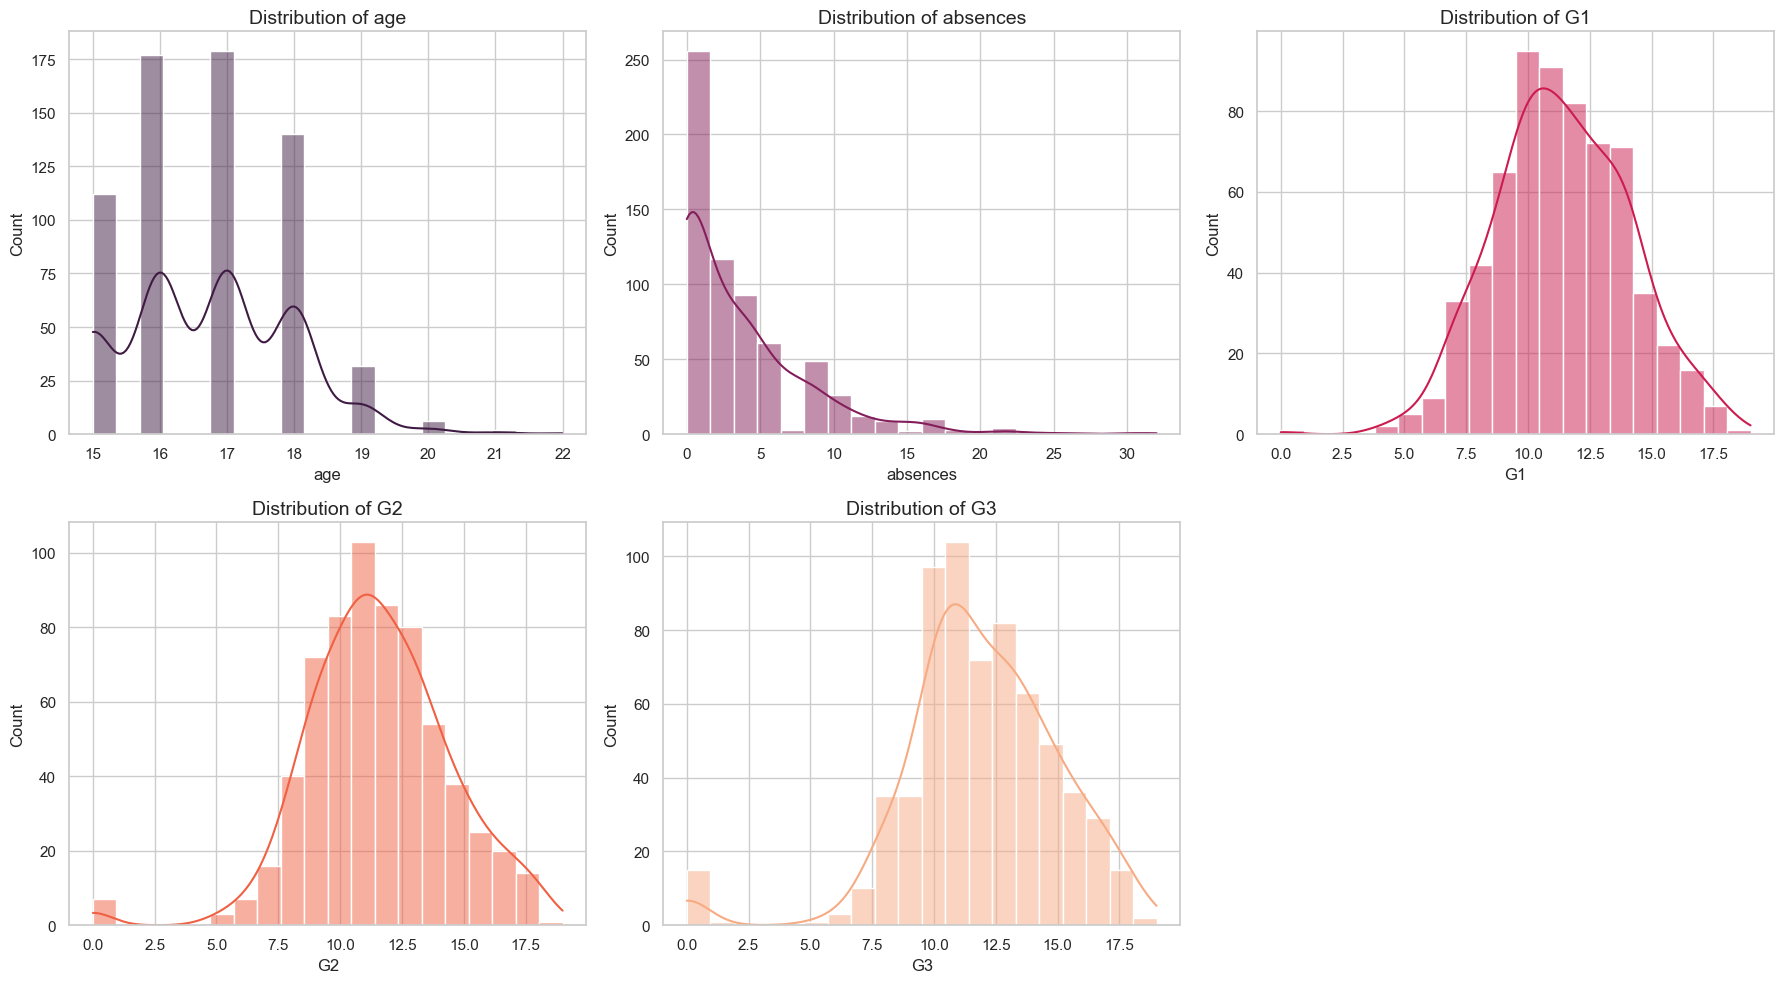

In [53]:
#  Histograms for numerical columns using color palettes
numerical_cols = ['age', 'absences', 'G1', 'G2', 'G3']
palette = sns.color_palette("rocket", len(numerical_cols))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for ax, col, color in zip(axes.flatten(), numerical_cols, palette):
    sns.histplot(df_encoded[col], bins=20, kde=True, ax=ax, color=color)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Remove empty subplots
fig.delaxes(axes[1][2])

plt.tight_layout()
plt.show()


In [ ]:
# Box plots with vibrant color palette (e.g., "Set2")
categorical = ['sex', 'schoolsup', 'famsup', 'internet', 'romantic']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Choose a vibrant seaborn palette (try: "Set2", "husl", "coolwarm", "cubehelix")
palette_choice = "Set2"

for ax, col in zip(axes.flatten(), categorical):
    sns.boxplot(x=df[col], y=df['G3'], palette=palette_choice, ax=ax)
    ax.set_title(f'G3 by {col}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Final Grade (G3)')

# Remove unused subplot
fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()


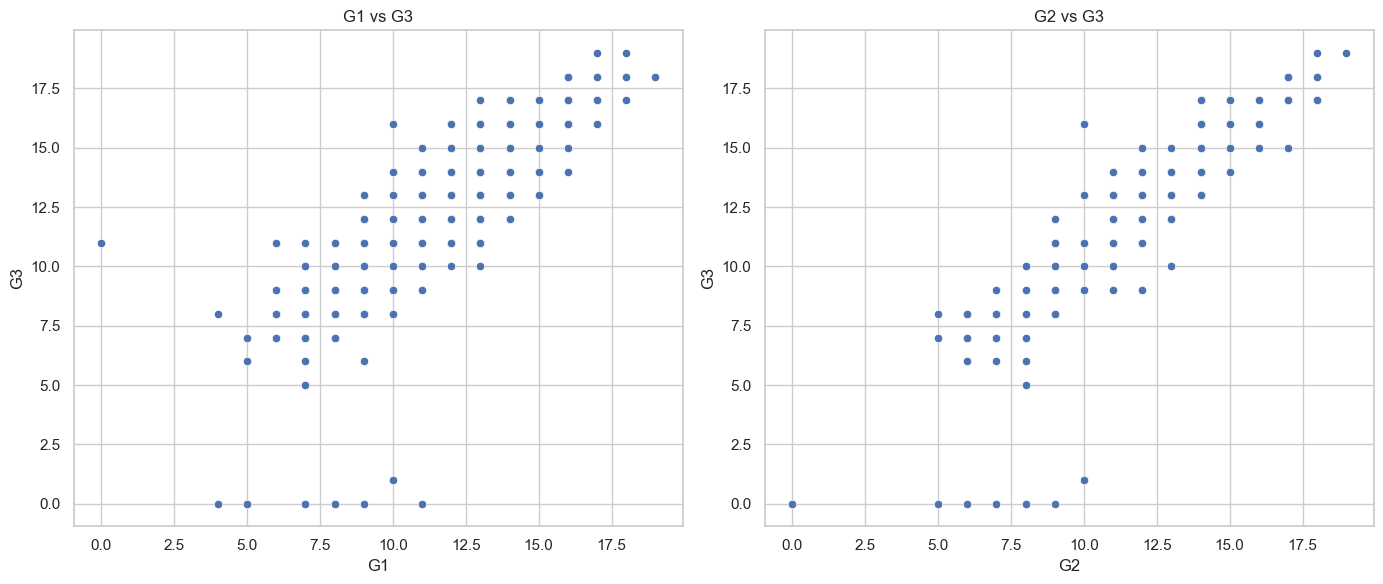

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df_encoded, x="G1", y="G3", ax=ax[0])
ax[0].set_title("G1 vs G3")
sns.scatterplot(data=df_encoded, x="G2", y="G3", ax=ax[1])
ax[1].set_title("G2 vs G3")
plt.tight_layout()
plt.show()

In [56]:
correlations = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print(correlations.head(10))

G3           1.000000
G2           0.918548
G1           0.826387
studytime    0.249789
Medu         0.240151
Fedu         0.211800
famrel       0.063361
goout       -0.087641
absences    -0.091379
health      -0.098851
Name: G3, dtype: float64


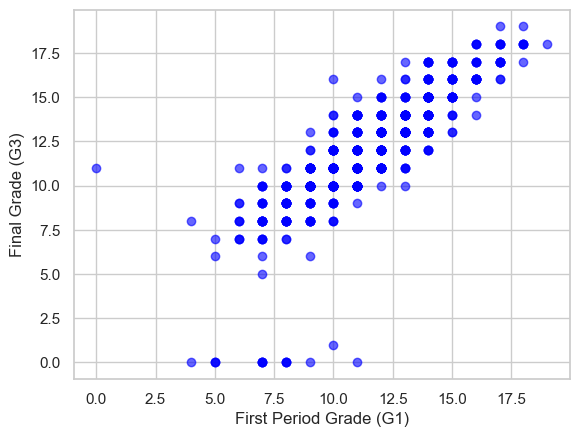

In [57]:
plt.scatter(df['G1'], df['G3'], color='blue', alpha=0.6)
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.show()

### simple linear regression

In [58]:
X = df[['G1']]
y = df['G3']

In [59]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [61]:
y_pred_simple = model_simple.predict(X_test_simple)
print(y_pred_simple[:5])
print(y_test_simple[:5].values)


[17.53389564 11.54577134 18.53191635 10.54775063 13.54181278]
[19 12 18 11 11]


In [62]:
print("Slope (a):", model_simple.coef_[0])
print("Intercept (b):", model_simple.intercept_)


Slope (a): 0.9980207154723949
Intercept (b): 0.5675434741274721


In [63]:
print("Simple Linear Regression - R²:", r2_score(y_test_simple, y_pred_simple))
print("Simple Linear Regression - MSE:", mean_squared_error(y_test_simple, y_pred_simple))

Simple Linear Regression - R²: 0.700270173947993
Simple Linear Regression - MSE: 2.9228801332943766


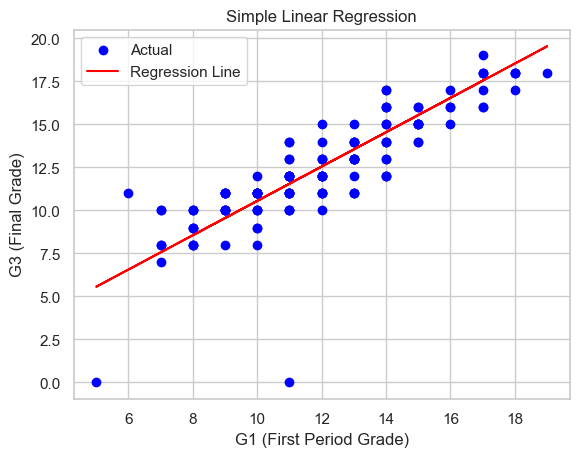

In [64]:
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

### Multiple Linear Regression

In [65]:
X_multiple = df[['G1', 'studytime', 'absences', 'failures']]  
y_multiple = df['G3']  

In [66]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [67]:
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [68]:
y_pred_multiple = model_multiple.predict(X_test_multiple)
print(y_pred_multiple[:5])
print(y_test_multiple[:5].values)

[17.39473759 11.62948583 18.23332454 10.7626785  13.53242283]
[19 12 18 11 11]


In [69]:
print(model_multiple.intercept_)

0.7469563779343407


In [70]:
print(model_multiple.coef_)

[ 0.9514685   0.17996761  0.02822039 -0.45334816]


In [71]:
print("Multiple Linear Regression - R²:", r2_score(y_test_multiple, y_pred_multiple))
print("Multiple Linear Regression - MSE:", mean_squared_error(y_test_multiple, y_pred_multiple))

Multiple Linear Regression - R²: 0.7107115760521283
Multiple Linear Regression - MSE: 2.821058545580181


### polynomial regression 

In [72]:
X_multiple = df[['G1', 'studytime', 'absences', 'failures']]
y = df_encoded['G3']

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
def evaluate_polynomial_regression(X_train, X_test, y_train, y_test, degrees):
    results = {}
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        y_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[degree] = {'MSE': mse, 'R2': r2}
        
        # Plotting the polynomial regression curve with carved smooth line
        plt.figure(figsize=(8,6))
        
        # Create a smooth line for plotting the polynomial regression fit
        X_line = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 1000).reshape(-1, 1)  # Dense values for smooth curve
        X_line_poly = poly.transform(X_line)  # Transform using polynomial features
        y_line_pred = model.predict(X_line_poly)  # Predict the y values for smooth line
        
        # Plot the true values and the carved polynomial regression line
        plt.scatter(X_test[:, 0], y_test, color='red', label='True values', alpha=0.6)
        plt.plot(X_line, y_line_pred, color='blue', label=f'Polynomial fit (Degree {degree})', linewidth=2)
        
        plt.xlabel('Age')
        plt.ylabel('Final Grade (G3)')
        plt.legend()
        plt.title(f'Polynomial Regression (Degree {degree})')
        plt.show()
    
    return results

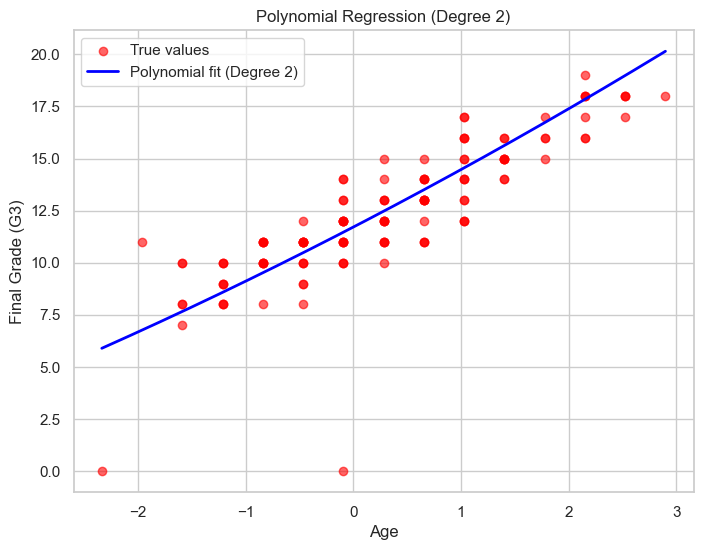

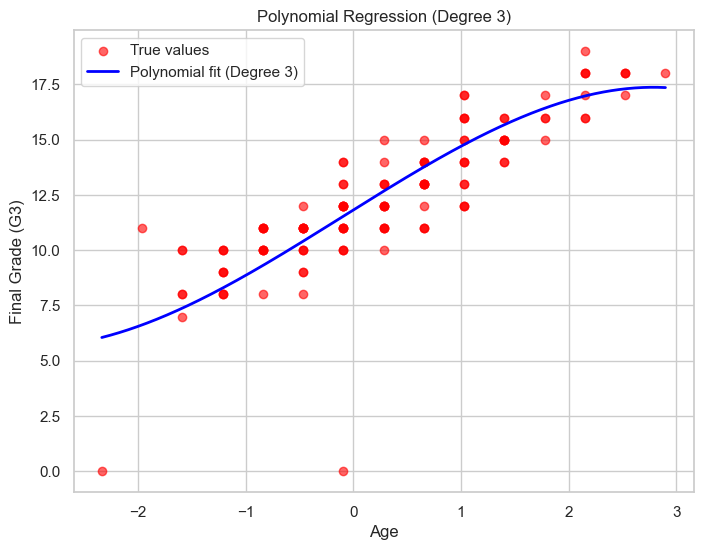

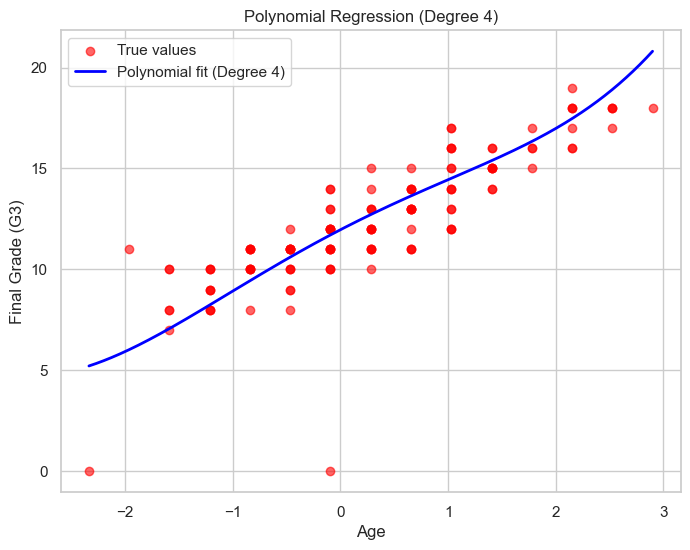

Degree 2: MSE = 2.9773956431394213, R2 = 0.6946798234930207
Degree 3: MSE = 3.0850157407884606, R2 = 0.6836438070718855
Degree 4: MSE = 3.1333774352430552, R2 = 0.6786845061066016


In [75]:
# Evaluate models with degrees 2, 3, and 4
degrees = [2, 3, 4]
results = evaluate_polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, degrees)

# Print the comparison results
for degree, metrics in results.items():
    print(f"Degree {degree}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")


### Logistic Regression with Classification


In [76]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [77]:
NumericDF = df.select_dtypes(include=np.number)
NumericDF.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1


In [78]:
corr_matrix = NumericDF.corr()
corr_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


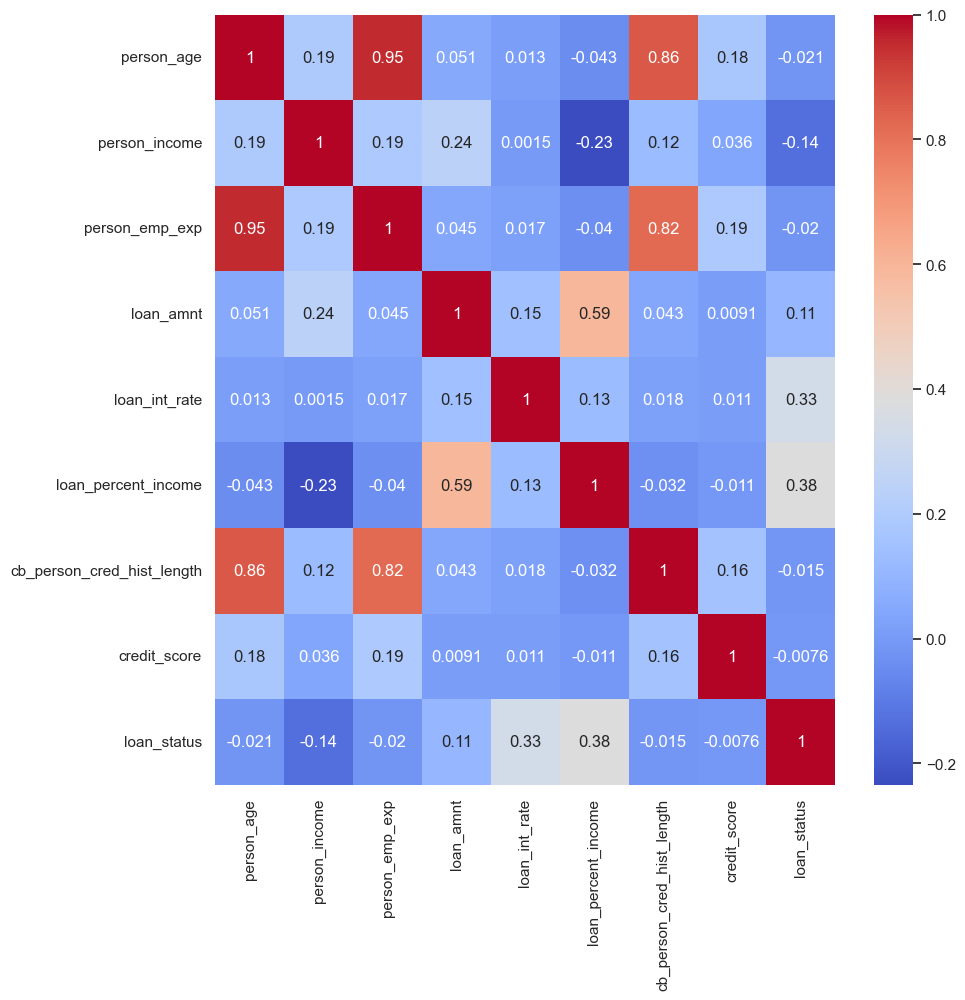

In [79]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [80]:
X = df[['person_income', 'loan_amnt']]
y = df['loan_status']

In [ ]:
# Handling missing values
X['person_income'] = X['person_income'].fillna(X['person_income'].median())
X['loan_amnt'] = X['loan_amnt'].fillna(X['loan_amnt'].median())

In [ ]:
# Handle outliers
income_cap = X['person_income'].quantile(0.99)
loan_cap = X['loan_amnt'].quantile(0.99)

X['person_income'] = np.where(X['person_income'] > income_cap, income_cap, X['person_income'])
X['loan_amnt'] = np.where(X['loan_amnt'] > loan_cap, loan_cap, X['loan_amnt'])

In [83]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [86]:
model.coef_

array([[-1.15308192,  0.68423888]])

In [87]:
model.intercept_

array([-0.28966815])

### **Confusion Matrix**

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
model.predict_proba(X_test_scaled)

array([[0.72891391, 0.27108609],
       [0.45285353, 0.54714647],
       [0.44064102, 0.55935898],
       ...,
       [0.4536737 , 0.5463263 ],
       [0.35989461, 0.64010539],
       [0.33625   , 0.66375   ]])

In [89]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

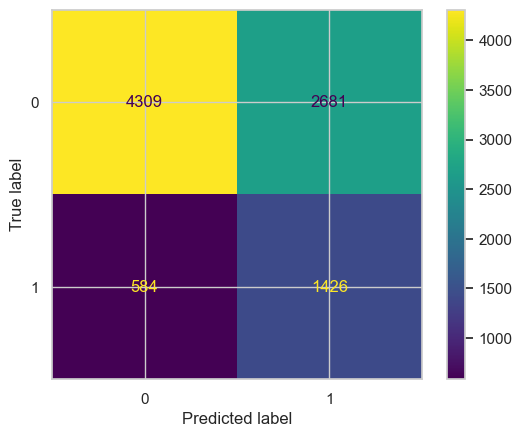

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()